# Group Project



Formar grupos de 2, máximo 3 pessoas.

**Dataset:** https://www.kaggle.com/tmdb/tmdb-movie-metadata


**Objectivo:** Usar técnicas de regressão para prever a rating de um filme com base em diferentes características.


**Notas importantes**
    
    1. Usar a coluna "vote_average" como target.
    2. Usar técnicas de regressão para prever a rating (vote_average) que um filme terá com base em diferentes caracteristicas.
    
**Recomendações**
    
    1. Não é necessário, nem recomendável, usar todas as features disponíveis (especialmente as que não são númericas).
    2. O exercício pode demorar muito ou pouco tempo, dependendo da exploração que for feita. Não é esperado que sejam explorados todos os detalhes, nem todas as abordagens possíveis.
    3. Se houver falta de tempo para explorar tudo o que gostariam, ou querem fazer alguma técnica que iria levar muito tempo, expliquem por escrito qual era a ideia e o que esperariam obter.
    4. Tentem explicar o máximo possível o racícionio por detrás de todos os passos que afectuarem.
    5. Acima de tudo, divirtam-se!
    
**Perguntas**

    1. Quantos filmes existem no dataset? E quantas features?
    2. Existem variáveis que não são independentes entre si?
    3. Qual a técnica de regressão que levou a melhores resultados?
    4. Quais os factores que mais contribuem para o sucesso de um filme?
    5. Recomendariam o vosso modelo a uma produtora de filmes?
    

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [106]:
use_google_colab = False
seed = 42

In [107]:
if use_google_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    datapath = '/content/drive/My Drive/Fundamentos_ML_Dados/tmdb_5000_movies.csv'
else:
    datapath = 'tmdb_5000_movies.csv'

In [108]:
df = pd.read_csv(datapath)

# 1. Quantos filmes existem no dataset? E quantas features?

---

In [109]:
print(f'movies no.{df.shape[0]}')
print(f'feature no.{df.shape[1]}')

movies no.4803
feature no.20


In [110]:
len(df["id"].unique())

4803

Nº  Features são apenas 18, porque o id é apenas um  identificador, e a coluna targetnão é considerado uma feature.

In [111]:
df.sample(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3890,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,10162,"[{""id"": 3864, ""name"": ""false identity""}, {""id""...",en,Waking Ned,"When a lottery winner dies of shock, his fello...",5.735912,"[{""name"": ""Fox Searchlight Pictures"", ""id"": 43...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...",1998-09-15,0,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,How far would you go to win a fortune!,Waking Ned,7.4,54
1574,30000000,"[{""id"": 35, ""name"": ""Comedy""}]",http://www.babymamamovie.net/,8780,"[{""id"": 3725, ""name"": ""pregnancy and birth""}, ...",en,Baby Mama,"A successful, single businesswoman who dreams ...",11.409124,"[{""name"": ""Relativity Media"", ""id"": 7295}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2008-04-23,63833449,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Would you put your eggs...in this basket?,Baby Mama,5.8,205
3629,5000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.bottleshockthemovie.com/,13996,"[{""id"": 5990, ""name"": ""wine garden""}, {""id"": 6...",en,Bottle Shock,Paris-based wine expert Steven Spurrier heads ...,6.174435,"[{""name"": ""Zininsa Film Production"", ""id"": 765...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2008-08-06,4040588,110.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,"Based on a true story of love, victory, and fe...",Bottle Shock,6.6,60
299,100000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,414,"[{""id"": 483, ""name"": ""riddle""}, {""id"": 849, ""n...",en,Batman Forever,The Dark Knight of Gotham City confronts a das...,48.205606,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1995-05-31,336529144,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Courage now, truth always...",Batman Forever,5.2,1498
2073,0,"[{""id"": 18, ""name"": ""Drama""}]",http://www.forcoloredgirlsmovie.com/,44944,"[{""id"": 293, ""name"": ""female nudity""}, {""id"": ...",en,For Colored Girls,About existence from the perspective of 20 nam...,1.934524,"[{""name"": ""Lions Gate Films"", ""id"": 35}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-05,37000000,134.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Many voices. One poem.,For Colored Girls,7.0,22


In [112]:
# prompt: print collumns name df
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

# 2. Existem variáveis que não são independentes entre si?

---

<Axes: >

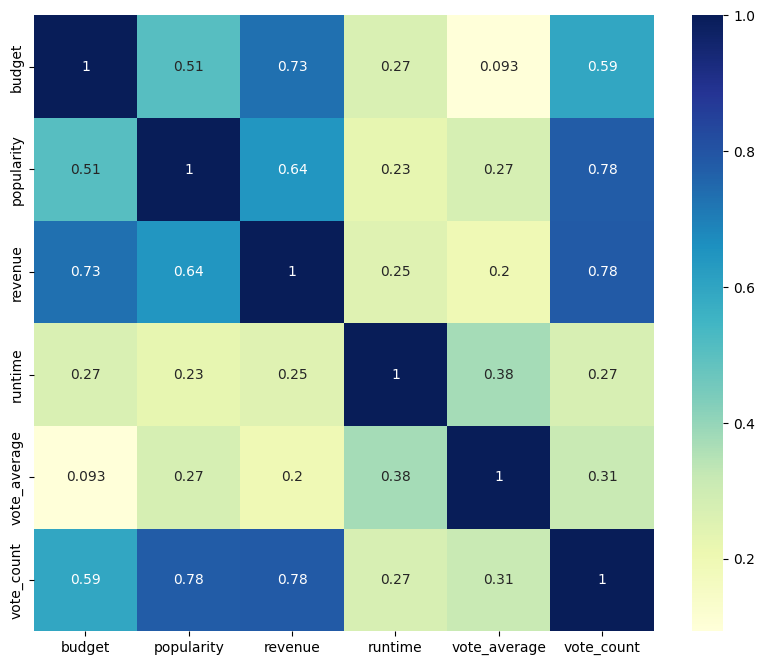

In [113]:
numeric_df = df.select_dtypes(include=['number'])
var_to_remove = ["id"]

numeric_var_df = numeric_df.drop(var_to_remove, axis=1)
spearman_corr = numeric_var_df.corr(method='spearman')
fig = plt.figure(figsize = (10, 8))
sns.heatmap(numeric_var_df.corr(), annot=True, cmap = "YlGnBu")

<Axes: >

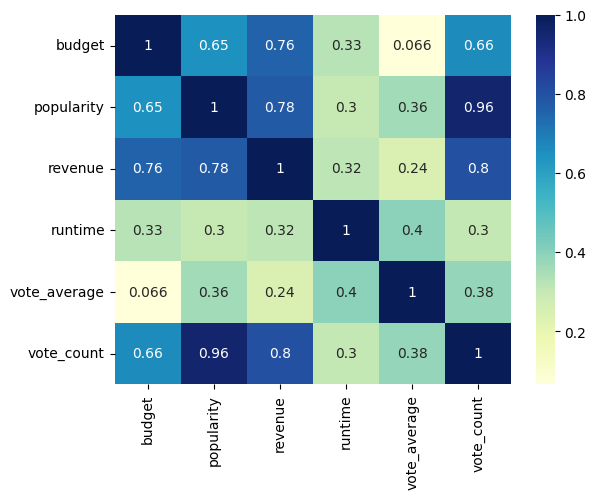

In [114]:
sns.heatmap(spearman_corr, annot=True, cmap = "YlGnBu")

Sim existem variaveis que não são independentes entre si, (popularity and vote_count), (revenue and vote count), (budget and revenue) and  (revenue and popularity)

In [115]:
# prompt: drop nulls variable runtime

numeric_var_df.dropna(inplace=True)


In [116]:
# prompt: list  correlation variables on dataframe numeric_var_df, exclude itself correaltion, minimum correlation 0.5, e
numeric_var_df.isnull().sum()
numeric_var_df.dropna(inplace=True)
# Calculate the correlation matrix
correlation_matrix = numeric_var_df.corr()

# Exclude self-correlation
correlation_matrix = correlation_matrix.mask(correlation_matrix == 1)

# Find variables with correlation above 0.5
correlated_vars = correlation_matrix[abs(correlation_matrix) >= 0.5]

# Print the correlated variables
correlated_vars


,budget,popularity,revenue,runtime,vote_average,vote_count
budget,NaN,0.505346,0.730798,NaN,NaN,0.593135
popularity,0.505346,NaN,0.644677,NaN,NaN,0.778098
revenue,0.730798,0.644677,NaN,NaN,NaN,0.781462
runtime,NaN,NaN,NaN,NaN,NaN,NaN
vote_average,NaN,NaN,NaN,NaN,NaN,NaN
vote_count,0.593135,0.778098,0.781462,NaN,NaN,NaN


In [117]:
print(df.columns.tolist())


['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count']


---

# 3. Qual a técnica de regressão que levou a melhores resultados?

---

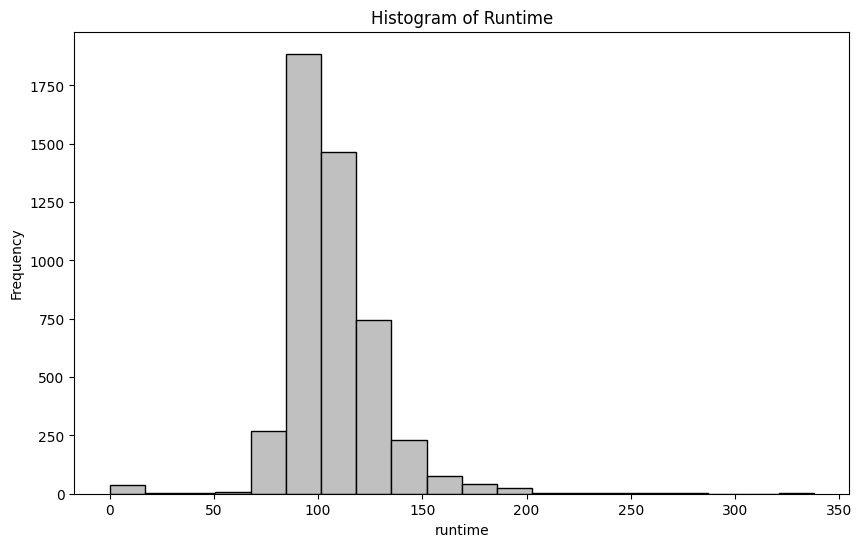

In [137]:
# prompt: create histogram variable RunTime

import matplotlib.pyplot as plt
# Assuming 'RunTime' is a column in your DataFrame 'df'
plt.figure(figsize=(10, 6))
plt.hist(df['runtime'], bins=20, color='silver', edgecolor='black')
plt.xlabel('runtime')
plt.ylabel('Frequency')
plt.title('Histogram of Runtime')
plt.show()


In [119]:
# prompt: variable runtime describe

# Assuming 'runtime' is the column you want to describe
runtime_description = df['runtime'].describe()
runtime_description


count    4801.000000
mean      106.875859
std        22.611935
min         0.000000
25%        94.000000
50%       103.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

In [120]:
# prompt: create kurtosis  and skewness variable runtime

# Calculate kurtosis and skewness
kurtosis = df['runtime'].kurtosis()
skewness = df['runtime'].skew()

print(f"Kurtosis of runtime: {kurtosis}")
print(f"Skewness of runtime: {skewness}")


Kurtosis of runtime: 8.935448828134865
Skewness of runtime: 0.7159565062897394


In [121]:
# prompt: variable runtime fill null with median

# Fill NaN values in 'runtime' with the median
numeric_df['runtime'] = numeric_df['runtime'].fillna(numeric_df['runtime'].median())


In [122]:
numeric_df

,budget,id,popularity,revenue,runtime,vote_average,vote_count
0,237000000,19995,150.437577,2787965087,162.0,7.2,11800
1,300000000,285,139.082615,961000000,169.0,6.9,4500
2,245000000,206647,107.376788,880674609,148.0,6.3,4466
3,250000000,49026,112.312950,1084939099,165.0,7.6,9106
4,260000000,49529,43.926995,284139100,132.0,6.1,2124
...,...,...,...,...,...,...,...
4798,220000,9367,14.269792,2040920,81.0,6.6,238
4799,9000,72766,0.642552,0,85.0,5.9,5
4800,0,231617,1.444476,0,120.0,7.0,6
4801,0,126186,0.857008,0,98.0,5.7,7


In [123]:
train_set, test_set = train_test_split(numeric_df, test_size=0.2, random_state=seed)

train_set = train_set.sample(frac=1, random_state=seed)

X_train = train_set.drop(columns=var_to_remove+['vote_average'])
y_train = train_set['vote_average']
X_test = test_set.drop(columns=var_to_remove+['vote_average'])
y_test = test_set['vote_average']

In [124]:
from sklearn.model_selection import RandomizedSearchCV

def get_optimal_param_RandomizedSearchCV_regression(estimator, param_dist, X_train, y_train, cv=5, n_iter=10, scoring="r2", random_state=42):
    """
    Otimiza os hiperparâmetros de um modelo de regressão usando RandomizedSearchCV.

    Parâmetros:
    - estimator: Modelo de machine learning para regressão (ex.: RandomForestRegressor()).
    - param_dist: Dicionário com os hiperparâmetros a testar.
    - X_train: Conjunto de treino (features).
    - y_train: Conjunto de treino (target).
    - cv: Número de folds para cross-validation (default = 5).
    - n_iter: Número de combinações aleatórias de hiperparâmetros a testar (default = 10).
    - scoring: Métrica de avaliação para otimização (default = "r2").
    - random_state: Semente aleatória para reprodutibilidade (default = 42).

    Retorna:
    - random_search: Objeto `RandomizedSearchCV` com os melhores hiperparâmetros encontrados.
    """
    # Criar RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=estimator,
        param_distributions=param_dist,
        n_iter=n_iter,  # Número de testes aleatórios
        scoring=scoring,  # Métrica de otimização
        cv=cv,
        n_jobs=-1,  # Usa todos os processadores disponíveis
        random_state=random_state
    )

    # Ajustar o modelo
    random_search.fit(X_train, y_train)

    # Mostrar os melhores hiperparâmetros encontrados
    print(f"Melhores hiperparâmetros para {estimator.__class__.__name__}: {random_search.best_params_}")

    return random_search


In [125]:
models_and_params = [
    # Exemplo: Rede Neural (ANN)
        (
        'ann',
        Pipeline(steps=[
            ('scaler', MinMaxScaler()),
            ('Regressor', MLPRegressor(random_state=seed))
        ]),
        {
            "Regressor__hidden_layer_sizes": [(20,), (40,), (20, 40), (40, 20), (20, 40, 60), (60, 40, 20)],
            "Regressor__max_iter": [100, 1000]
        }
    ),
    # Exemplo: Random Forest para regressão
    (
        'random_forest',
        RandomForestRegressor(random_state=seed),
        {
            'n_estimators': [10,50, 100, 300],
            'max_depth': [2, 4, 6,10],
            'min_samples_split': [5],
            'min_samples_leaf': [4]
        }
    ),
    # Exemplo: Decision Tree para regressão
    (
        'decision_tree',
        DecisionTreeRegressor(random_state=seed),
        {
            'max_depth': [2, 4, 6, 8],
            'min_samples_split': [2, 4, 6, 10],
            'min_samples_leaf': [1, 4, 10],
            'criterion': ["squared_error", "absolute_error"],
            'splitter': ["best", "random"]
        }
    ),
    # Exemplo: SVM para regressão (SVR)
    (
        'svm',
        Pipeline(steps=[
            ('scaler', MinMaxScaler()),
            ('Regressor', SVR())
        ]),
        {
            "Regressor__C": [0.1, 1, 10],
            "Regressor__gamma": np.logspace(-9, 3, 10),
            "Regressor__kernel": ["linear", "rbf"]
        }
    ),
    # Exemplo: KNN para regressão
    (
        'knn',
        Pipeline(steps=[
            ('scaler', MinMaxScaler()),
            ('Regressor', KNeighborsRegressor())
        ]),
        {
            "Regressor__n_neighbors": [1, 10, 100]
        }
    ),
    # Exemplo: Regressão Polinomial
   (
    'polynomial_regression',
    Pipeline(steps=[
        ('scaler', MinMaxScaler()),
        ('poly', PolynomialFeatures(include_bias=False)),
        ('regressor', LinearRegression())
    ]),
    {
        'poly__degree': [2, 3, 4],
        'regressor__fit_intercept': [True, False]
    }
),
    # Exemplo: Regressão Múltipla (LinearRegression)
    (
        'multiple_linear_regression',
        Pipeline(steps=[
            ('scaler', MinMaxScaler()),
            ('regressor', LinearRegression())
        ]),
        {
            'regressor__fit_intercept': [True, False]
            # Você pode incluir mais parâmetros se necessário
        }
    )
]


In [126]:
grid_search_results = []

for model_str, clf, params in models_and_params:
  print(f"Currently assessing {model_str}")
  grid_searech_result = GridSearchCV(clf, params, cv = 5).fit(X_train, y_train)
  grid_search_results.append(grid_searech_result)

Currently assessing ann


c:\Users\PereiraRodrigues\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\PereiraRodrigues\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\PereiraRodrigues\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\PereiraRodrigues\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: M

Currently assessing random_forest
Currently assessing decision_tree


c:\Users\PereiraRodrigues\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Currently assessing svm
Currently assessing knn
Currently assessing polynomial_regression
Currently assessing multiple_linear_regression


In [127]:
def adjusted_r2(r2, X):


    return (1 - ((1 - r2)*(X.shape[0] - 1)/(X.shape[0] - X.shape[1] - 1)))

In [128]:
def get_residuals_all_models(models_and_params, X_train, y_train, X_test, y_test, scoring='r2', cv=5):
    """
    Para cada modelo em models_and_params:
      1) Executa um GridSearchCV usando 'scoring' e 'cv' definidos.
      2) Treina no (X_train, y_train).
      3) Faz predições em X_test.
      4) Calcula resíduos (y_test - y_pred).
      5) Retorna um dicionário com os resíduos de cada modelo.

    Parâmetros:
    - models_and_params: lista de tuplas (nome_modelo, pipeline, param_grid).
    - X_train, y_train: dados de treino.
    - X_test, y_test: dados de teste.
    - scoring: métrica a ser otimizada no GridSearch (default: 'r2').
    - cv: número de folds (default: 5).

    Retorna:
    - residuals_dict: dicionário {nome_modelo: vetor_de_residuos}
    """
    residuals_dict = {}
    y_pred_dict = {}

    for model_name, pipeline, param_grid in models_and_params:
        # Cria o GridSearchCV para o pipeline com os parâmetros
        gs = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            scoring=scoring,
            cv=cv,
            n_jobs=-1
        )

        # Ajusta no conjunto de treino
        gs.fit(X_train, y_train)

        # Extrai o melhor modelo encontrado
        best_model = gs.best_estimator_

        # Predição no conjunto de teste
        y_pred = best_model.predict(X_test)

        # Cálculo dos resíduos (valor real - predito)
        residuals = y_test - y_pred

        # Armazena no dicionário
        residuals_dict[model_name] = residuals
        y_pred_dict[model_name] = y_pred

    return residuals_dict, y_pred_dict


In [129]:
residuals_dict, y_pred_dict= get_residuals_all_models(models_and_params, X_train, y_train, X_test, y_test, scoring='r2', cv=5)

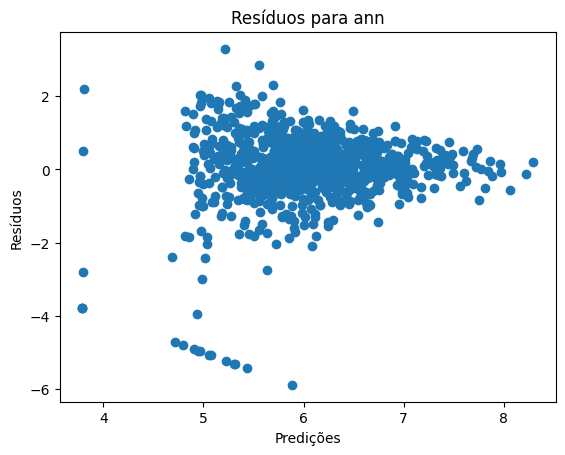

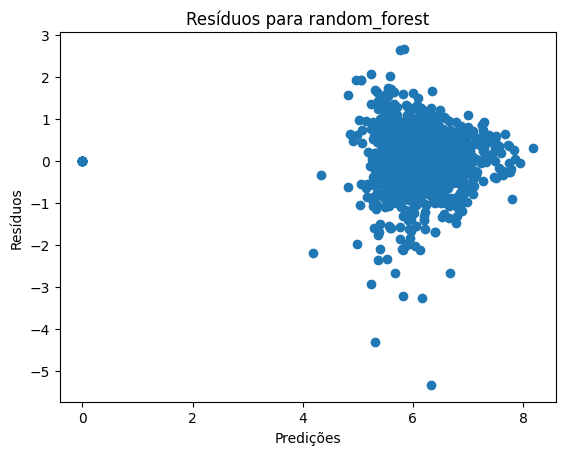

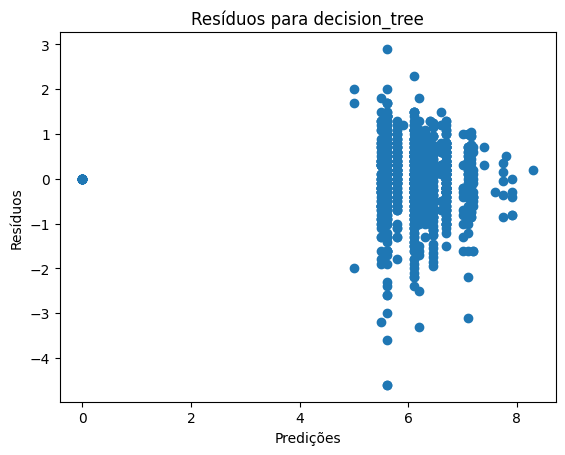

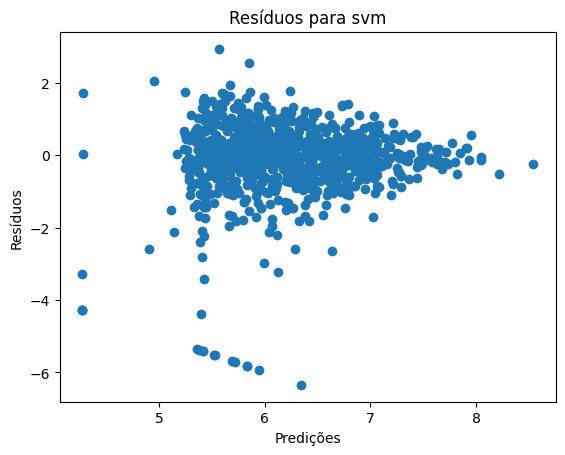

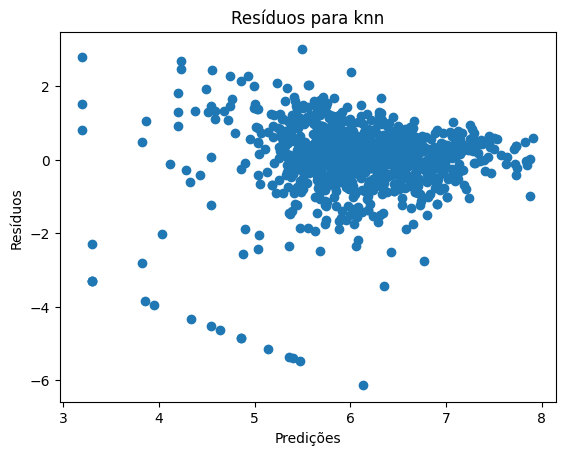

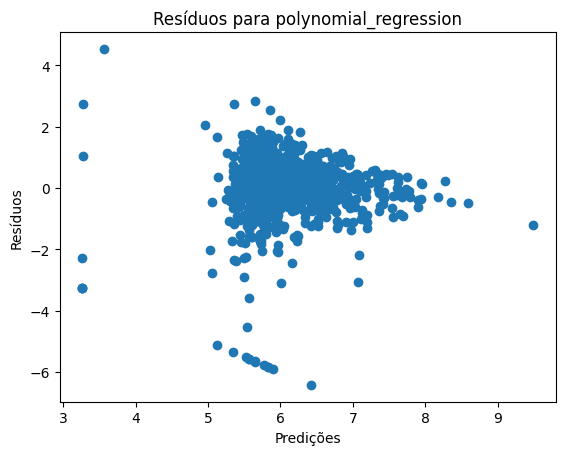

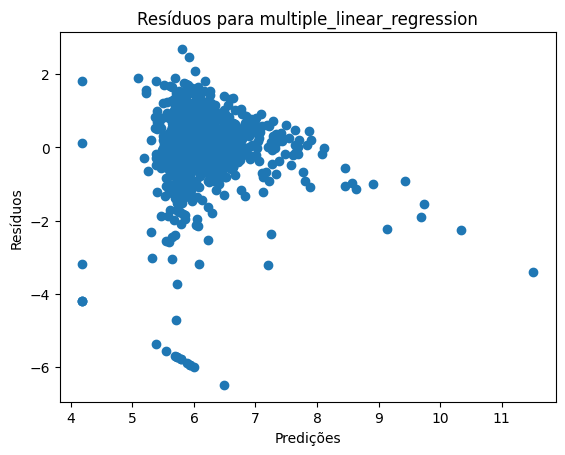

In [130]:
for model_name in residuals_dict:
    current_residuals = residuals_dict[model_name]  # array/Series
    current_y_pred    = y_pred_dict[model_name]      # array/Series

    plt.scatter(current_y_pred, current_residuals)
    plt.xlabel("Predições")
    plt.ylabel("Resíduos")
    plt.title(f"Resíduos para {model_name}")
    plt.show()

In [131]:
grid_search_results

[GridSearchCV(cv=5,
              estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                        ('Regressor',
                                         MLPRegressor(random_state=42))]),
              param_grid={'Regressor__hidden_layer_sizes': [(20,), (40,),
                                                            (20, 40), (40, 20),
                                                            (20, 40, 60),
                                                            (60, 40, 20)],
                          'Regressor__max_iter': [100, 1000]}),
 GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
              param_grid={'max_depth': [2, 4, 6, 10], 'min_samples_leaf': [4],
                          'min_samples_split': [5],
                          'n_estimators': [10, 50, 100, 300]}),
 GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
              param_grid={'criterion': ['squared_error', 'absolute_error'],
     

In [132]:
def get_r2_all_models(models_and_params, X_train, y_train, X_test, y_test, scoring='r2', cv=5):
    """
    Para cada modelo em models_and_params:
      1) Executa um GridSearchCV usando 'scoring' e 'cv' definidos.
      2) Treina no (X_train, y_train).
      3) Faz predições em X_test.
      4) Calcula R² (comparando y_test e y_pred).
      5) Retorna um dicionário com R² de cada modelo no conjunto de teste.

    Parâmetros:
    - models_and_params: lista de tuplas (nome_modelo, pipeline, param_grid).
    - X_train, y_train: dados de treino.
    - X_test, y_test: dados de teste.
    - scoring: métrica a ser otimizada no GridSearch (default: 'r2').
    - cv: número de folds (default: 5).

    Retorna:
    - r2_dict: {nome_modelo: r2_score_no_teste}
    """

    r2_dict = {}

    for model_name, pipeline, param_grid in models_and_params:
        # Cria o GridSearchCV para o pipeline com os parâmetros
        gs = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            scoring=scoring,
            cv=cv,
            n_jobs=-1
        )

        # Ajusta no conjunto de treino (usando cross-validation)
        gs.fit(X_train, y_train)

        # Extrai o melhor modelo encontrado
        best_model = gs.best_estimator_

        # Predição no conjunto de teste
        y_pred = best_model.predict(X_test)

        # Calcula R²
        r2 = r2_score(y_test, y_pred)

        # Armazena no dicionário
        r2_dict[model_name] = r2

    return r2_dict


In [133]:
r2_results = get_r2_all_models(
    models_and_params, 
    X_train, y_train, 
    X_test, y_test, 
    scoring='r2', 
    cv=5
)

# Exibir os resultados
for model_name, r2_val in r2_results.items():
    print(f"Modelo: {model_name} | R² (teste): {r2_val:.4f}")


Modelo: ann | R² (teste): 0.3666
Modelo: random_forest | R² (teste): 0.6147
Modelo: decision_tree | R² (teste): 0.5541
Modelo: svm | R² (teste): 0.3092
Modelo: knn | R² (teste): 0.3647
Modelo: polynomial_regression | R² (teste): 0.2761
Modelo: multiple_linear_regression | R² (teste): 0.2277


 calculo de r2 ajustado para funções lineares

In [134]:
r2_df = pd.DataFrame(
    [(model, r2_val, float('nan')) for model, r2_val in r2_results.items()],
    columns=['model', 'r2', 'r2_adj']
)

for idx, row in r2_df.iterrows():
    if row['model'] in ['polynomial_regression', 'multiple_linear_regression']:
        r2_df.at[idx, 'r2_adj'] = adjusted_r2(row['r2'], X_test)

print(r2_df)

                        model        r2    r2_adj
0                         ann  0.366580       NaN
1               random_forest  0.614687       NaN
2               decision_tree  0.554087       NaN
3                         svm  0.309222       NaN
4                         knn  0.364726       NaN
5       polynomial_regression  0.276124  0.272334
6  multiple_linear_regression  0.227720  0.223676


Os resultados indicam que o Random Forest, com um R² de aproximadamente 0,61, foi o modelo com melhor desempenho no conjunto de teste, superando os restantes algoritmos. Esse resultado reforça a eficácia que  múltiplas árvores de decisão combinadas capturam melhor relações não lineares e reduzem o overfitting em comparação com uma única árvore de decisão.

A Decision Tree, isoladamente, obteve um R² de 0,55, um valor satisfatório, mas inferior ao do Random Forest, o que era esperado, visto que uma única árvore de decisão é mais suscetível a sobreajuste e menos robusta.

A Rede Neural (ANN) apresentou um desempenho inferior ao esperado, com um R² de 0,37, o que pode indicar que a otimização dos seus hiperparâmetros não foi suficiente para capturar as relações complexas dos dados. O fato de o modelo não ter convergido dentro das 100 iterações também pode ter prejudicado seu desempenho.

O Support Vector Machine (SVM) apresentou um R² de 0,31, ficando abaixo dos métodos baseados em árvores. Esse desempenho pode ser consequência de uma escolha inadequada de hiperparâmetros ou da falta de padrões claros nos dados para um modelo de margem como o SVM.

O KNN registrou um R² de 0,36, sugerindo que a simples proximidade entre os exemplos não capturou bem as relações subjacentes nos dados.

A Regressão Polinomial obteve um R² de 0,28 (com um R² ajustado de 0,27), indicando que, mesmo adicionando termos polinomiais às variáveis, o modelo não conseguiu superar os métodos baseados em árvores.

A Regressão Múltipla foi o modelo com pior desempenho, com um R² de 0,23 e um R² ajustado de 0,22, confirmando que os dados podem não seguir uma relação linear simples.

---

# 4. Quais os factores que mais contribuem para o sucesso de um filme?
---

Interpretamos que o sucesso do filme se reflete na sua classificação de avaliação (variável de saída do problema). Assim, para identificar os fatores que mais contribuem para este valor, decidimos utilizar uma regressão baseada em Random Forest, na qual são calculadas as importâncias de cada variável e a respetiva contribuição para a explicação do resultado final.

In [135]:
selected_model = RandomForestRegressor(n_estimators=100, random_state=42)
selected_model.fit(X_train, y_train)

# Obter a importância das features (média sobre as árvores) e o desvio padrão
feature_importances = selected_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in selected_model.estimators_],
             axis=0)

# Criar um DataFrame para apresentar resultados
feature_importances_df = pd.DataFrame.from_dict({
    "Feature": X_train.columns,
    "Importance": feature_importances,
    "Std": std
}).sort_values(by="Importance", ascending=False)

# Calcular a importância acumulada (percentagem)
feature_importances_df["Cumulative Importance"] = (
    feature_importances_df["Importance"].cumsum() 
    / feature_importances_df["Importance"].sum()
)

feature_importances_df

,Feature,Importance,Std,Cumulative Importance
4,vote_count,0.520700,0.027703,0.520700
3,runtime,0.178438,0.016607,0.699139
1,popularity,0.142194,0.015836,0.841333
0,budget,0.101655,0.009098,0.942988
2,revenue,0.057012,0.008020,1.000000


A análise da importância das variáveis no modelo de Random Forest revela que o número de votos ("vote_count") é o fator mais determinante na previsão da avaliação de um filme, representando 52,07% da contribuição total. Isto sugere que filmes com um maior número de avaliações tendem a ter uma classificação mais representativa, uma vez que refletem a opinião de um público mais amplo. Segue-se a duração do filme ("runtime"), com 17,84% de importância, indicando que o tempo de ecrã influencia a perceção da qualidade. A popularidade ("popularity"), responsável por 14,22% da variação na avaliação, reforça a ideia de que filmes amplamente discutidos e consumidos tendem a ter classificações mais previsíveis.

Por outro lado, o orçamento ("budget"), com 10,17% de importância, demonstra que, não garante por si só, a previsão de uma avaliação. Por fim, a receita bruta ("revenue") revela-se a variável com menor influência, representando apenas 5,70%. Este dado sugere que um grande sucesso de bilheteira não implica necessariamente uma boa receção crítica, já que fatores como marketing e hype podem impulsionar os lucros sem que estes correspondam à verdadeira qualidade do filme.

De forma geral, podemos dizer que o envolvimento do público, expresso pelo número de votos e pela popularidade, podem ser fatores determinantes na avaliação de um filme, enquanto os aspetos financeiros, como o orçamento e a receita, desempenham um papel secundário.

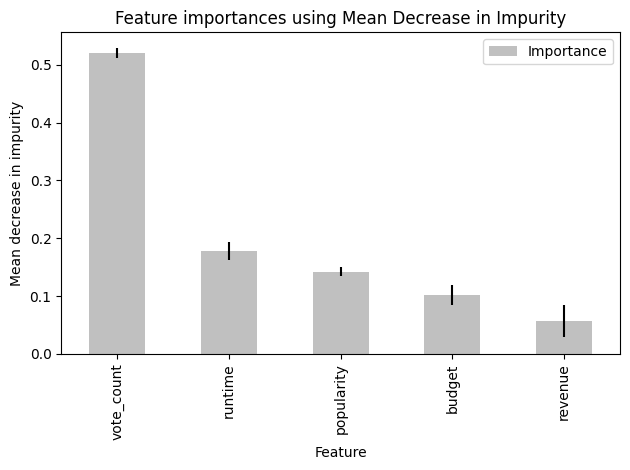

In [136]:
fig, ax = plt.subplots()
feature_importances_df.plot.bar(x="Feature", y="Importance",yerr=std, ax=ax,color="silver")
ax.set_title("Feature importances using Mean Decrease in Impurity")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# 5. Recomendariam o vosso modelo a uma produtora de filmes?

---

a desenvolver! :D